In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from matplotlib import pyplot as plt

In [ ]:
# 读取数据
df = pd.read_excel(r"C:\Users\yuweidin\Desktop\coding\MQL\MQL raw data.xlsx")

# 确保日期是datetime格式并设置为索引
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

In [3]:
# 对MQL列进行ARIMA预测
model = SARIMAX(df['MQL'], order=(5,1,0), seasonal_order=(1,1,1,12))
model_fit = model.fit()

In [4]:
# 获取预测
forecast = model_fit.forecast(steps=30) # 预测未来30天

In [5]:
# 将预测结果转换为数据框，便于后续处理
forecast_df = pd.DataFrame({'predicted_MQL': forecast}, index=pd.date_range(start=df.index[-1], periods=30, freq='D'))

In [6]:
# 找出预测的MQL较低的日期
threshold = forecast_df['predicted_MQL'].quantile(0.25) # 例如，选择低于25%分位数的日期
low_days = forecast_df[forecast_df['predicted_MQL'] < threshold].index

In [7]:
# 打印预测的MQL较低的日期
for day in low_days:
    print(day.strftime('%Y-%m-%d'))

2023-08-03
2023-08-04
2023-08-10
2023-08-16
2023-08-22
2023-08-27
2023-08-28


In [8]:
forecast_df['predicted_MQL']

2023-07-31           NaN
2023-08-01    108.481152
2023-08-02     68.551969
2023-08-03     51.338369
2023-08-04     59.790181
2023-08-05     72.931211
2023-08-06    128.152653
2023-08-07    107.960905
2023-08-08    222.577213
2023-08-09    193.647310
2023-08-10     49.439791
2023-08-11    136.761239
2023-08-12    128.491107
2023-08-13     77.643756
2023-08-14     81.125504
2023-08-15     60.014488
2023-08-16     58.095341
2023-08-17     91.728244
2023-08-18     95.013311
2023-08-19     86.690128
2023-08-20    204.097680
2023-08-21    183.688843
2023-08-22     51.438389
2023-08-23    121.637883
2023-08-24    126.594427
2023-08-25     70.443482
2023-08-26     71.330397
2023-08-27     52.758600
2023-08-28     53.395324
2023-08-29     83.447872
Freq: D, Name: predicted_MQL, dtype: float64

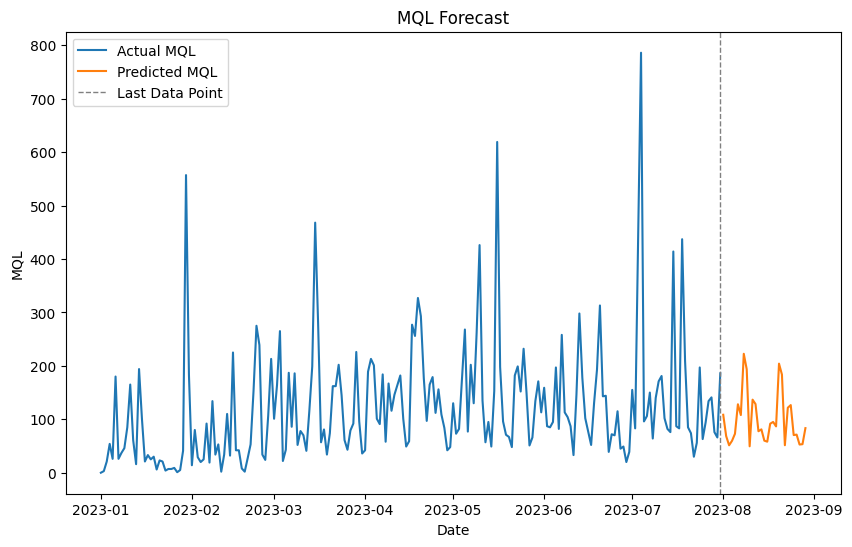

In [9]:
# 添加预测结果到数据框
forecast_df['Date'] = pd.date_range(start=df.index[-1], periods=len(forecast_df))
forecast_df.set_index('Date', inplace=True)

# 绘制曲线图
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['MQL'], label='Actual MQL')
plt.plot(forecast_df.index, forecast_df['predicted_MQL'], label='Predicted MQL')
plt.axvline(x=df.index[-1], color='gray', linestyle='--', linewidth=1, label='Last Data Point')
plt.title('MQL Forecast')
plt.xlabel('Date')
plt.ylabel('MQL')
plt.legend()
plt.show()

# 保存预测结果
forecast_df.to_csv('MQL_forecast.csv')